In [27]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import nutpie

# Ch 13

In [28]:
data = np.array([5])
alpha_0 = 2.1
beta_0 = 1

In [29]:
with pm.Model() as sharks_model:
  lambda_ = pm.Gamma("lambda", alpha_0, beta_0)
  observation = pm.Poisson("obs", lambda_, observed=data)

  step = pm.Metropolis()
  trace = pm.sample(25000, tune=5000, step=step, chains=1)

Output()

[]

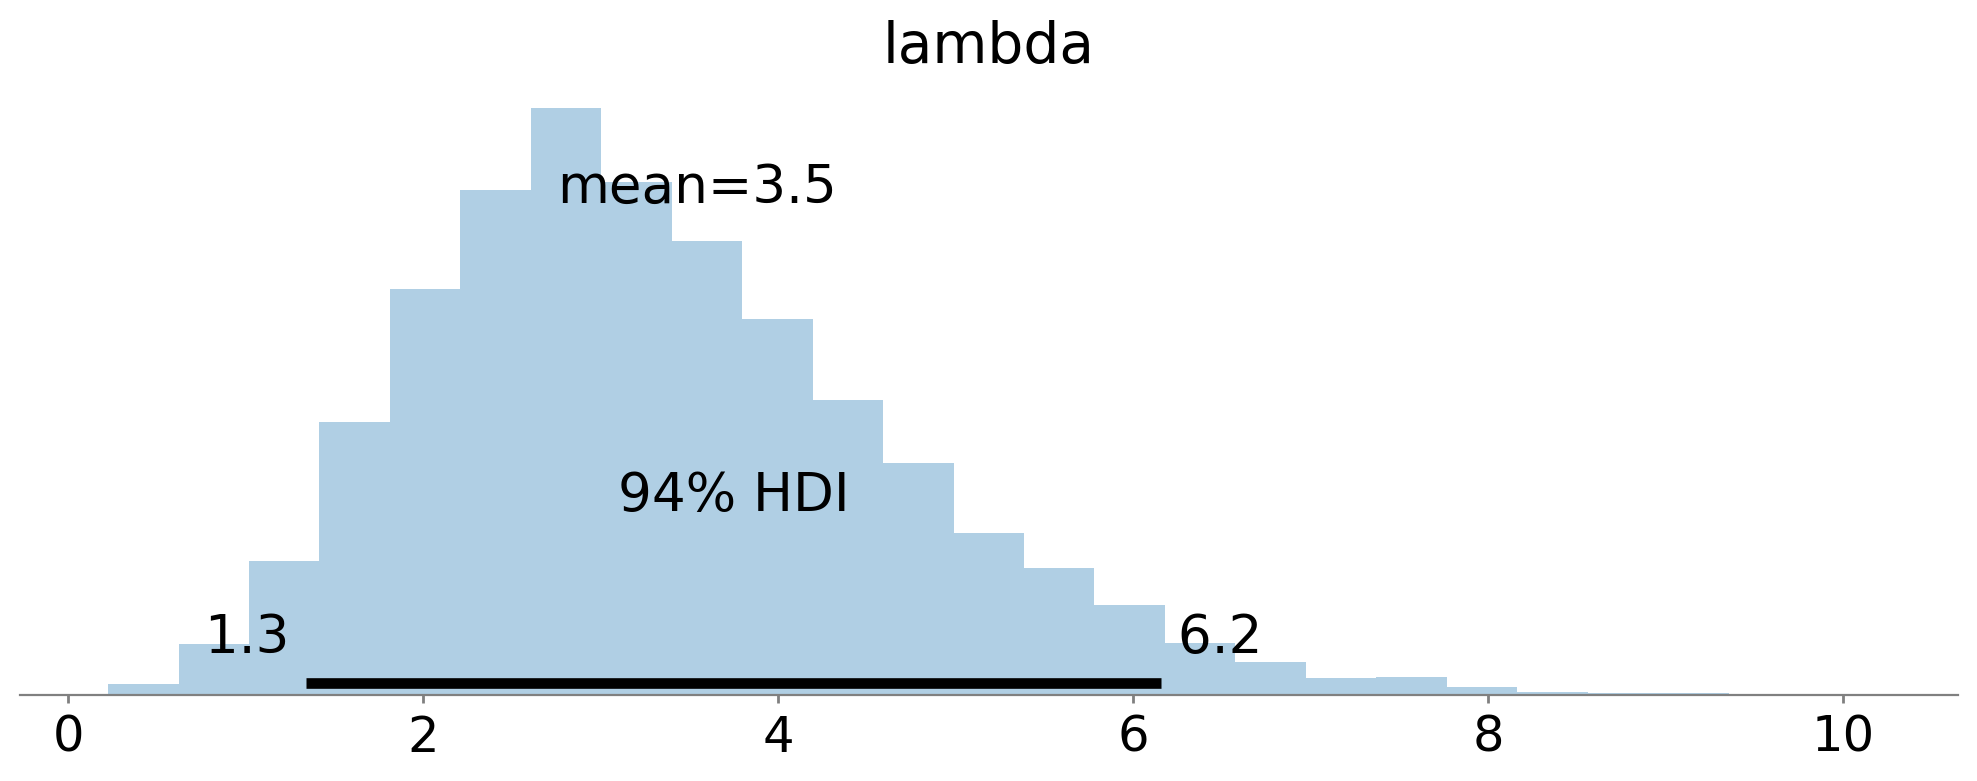

In [30]:
%config InlineBackend.figure_format = 'retina'

ax = az.plot_posterior(trace, var_names=['lambda'], kind='hist', bins=25, figsize=(12.5,4))
ax.plot()

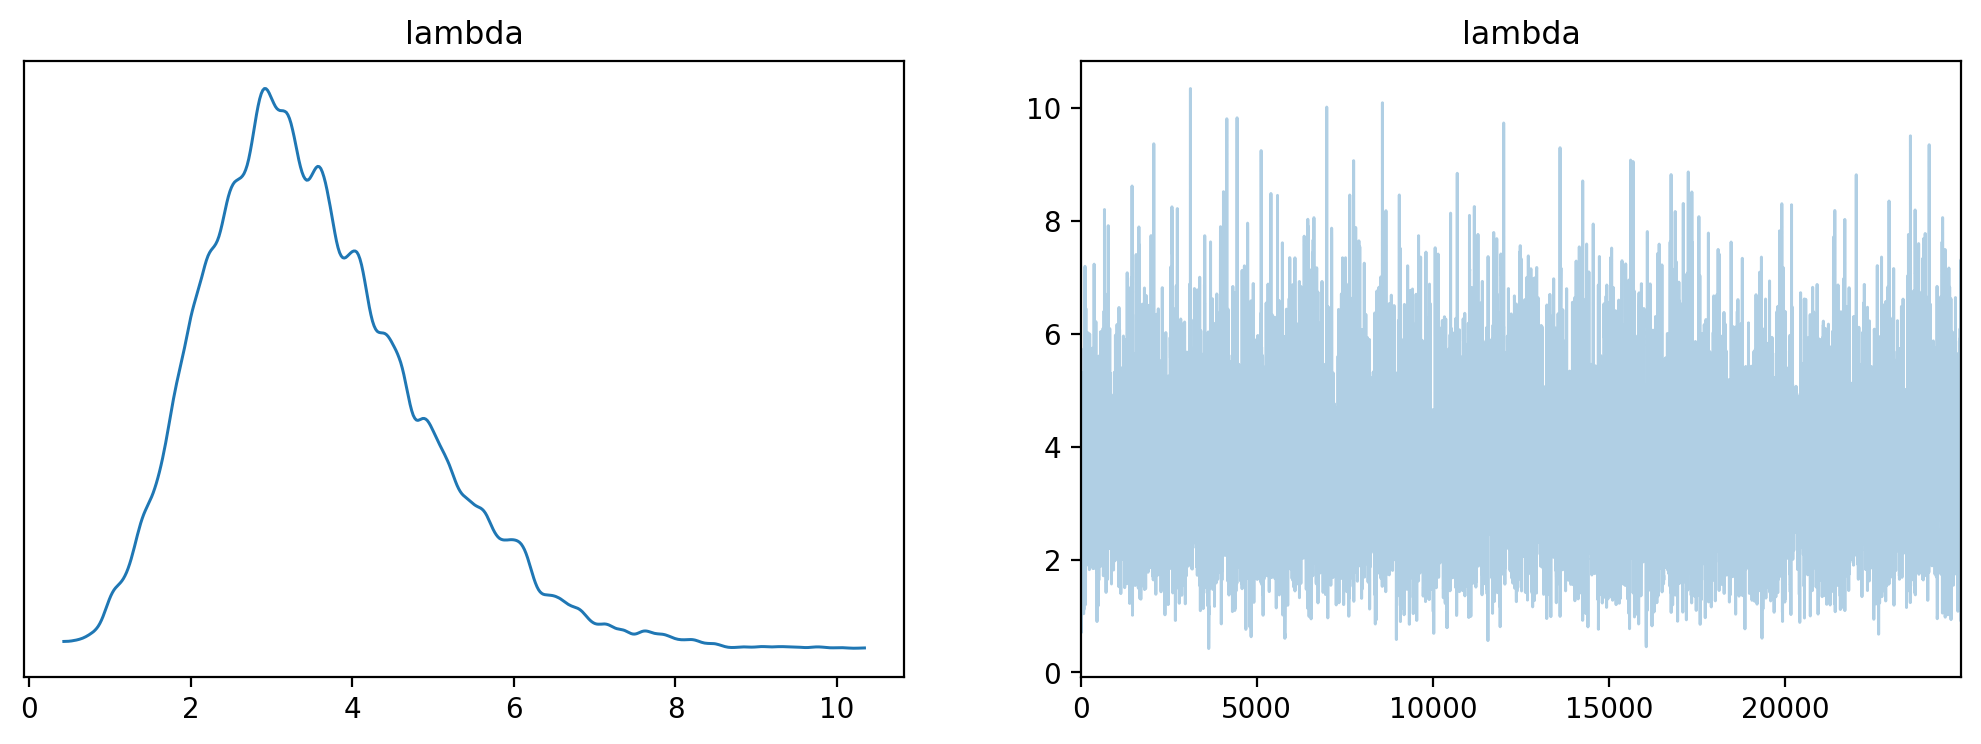

In [31]:
az.plot_trace(trace, figsize=(12.5, 4))
plt.show()

In [32]:
az.summary(trace)

Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda,3.54,1.339,1.339,6.159,0.019,0.013,4835.0,5203.0,NaN


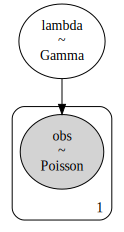

In [33]:
graphviz = pm.model_to_graphviz(sharks_model)
graphviz

# Ch 15

In [34]:
alpha_0 = 0.5
beta_0 = 0.5
data = np.array([0])
tuning_beta = 3.

In [35]:
from pymc.step_methods.metropolis import Proposal
class BetaProposal(Proposal):
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta

    def __call__(self, random_state=None):
        return np.random.beta(self.alpha, self.beta, size=1)

In [36]:
with pm.Model() as white_house_model:
  theta = pm.Beta("theta", alpha_0, beta_0)
  observation = pm.Bernoulli("obs", theta, observed=data)

  alpha_ = (tuning_beta * theta.eval()) / (-theta.eval() + 1)
  step = pm.Metropolis(prop_dist=BetaProposal(alpha_, tuning_beta))
  trace = pm.sample(25000, tune=5000, step=step, chains=1)

Output()

[]

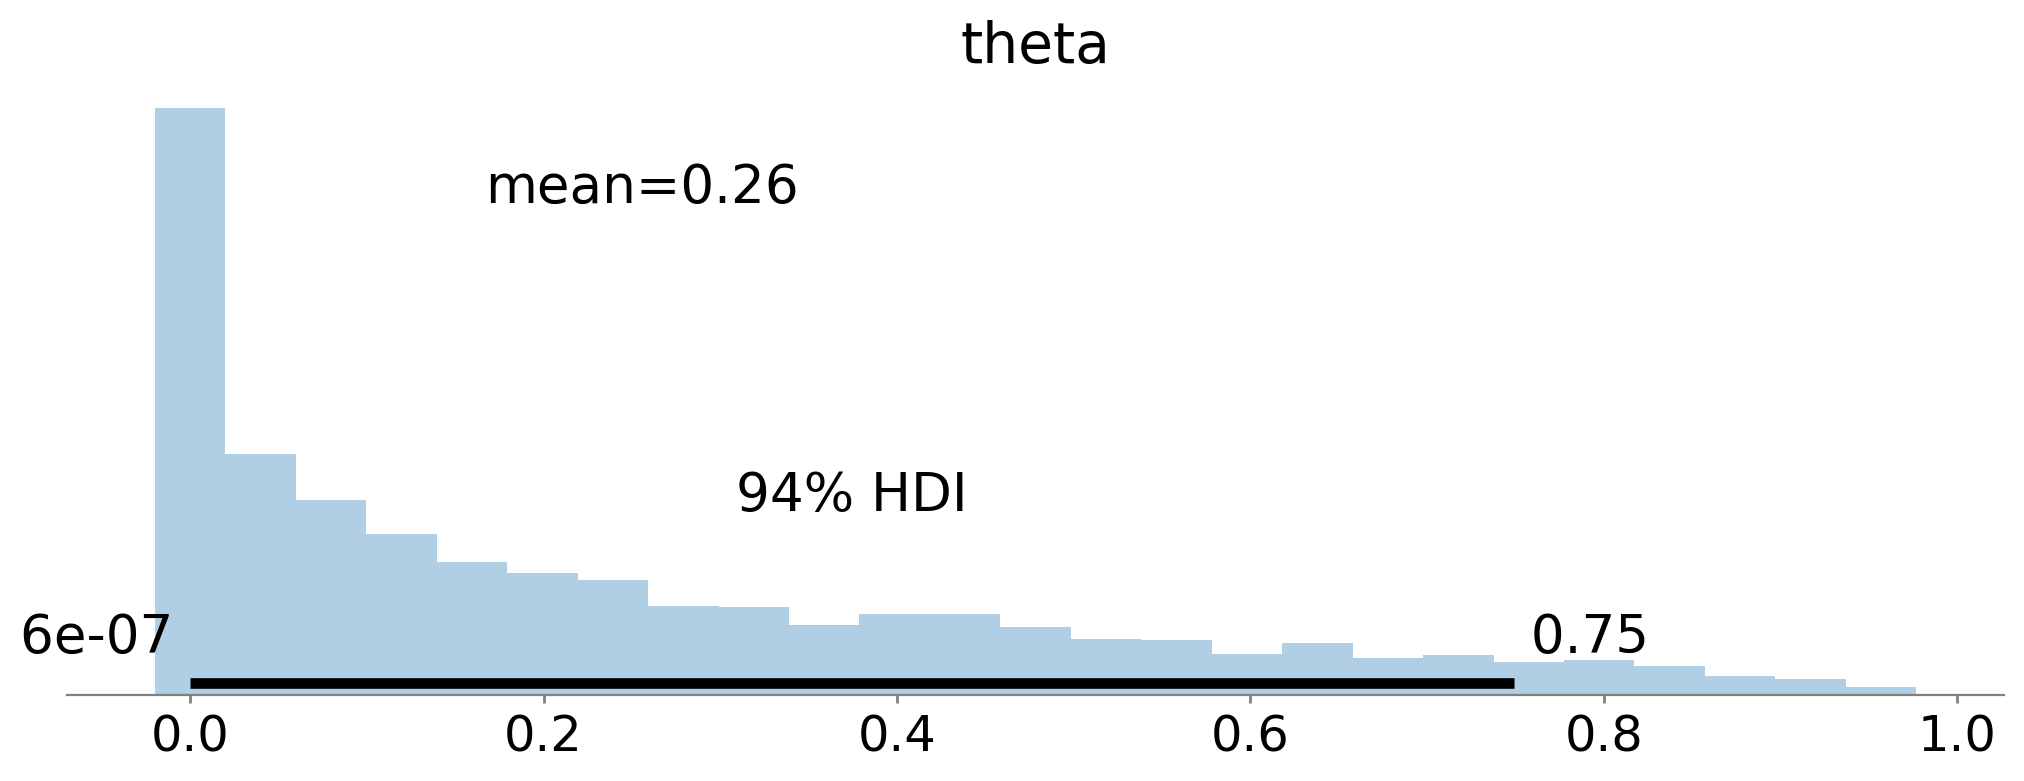

In [37]:
%config InlineBackend.figure_format = 'retina'

ax=az.plot_posterior(trace, var_names=['theta'], kind='hist', bins=25, figsize=(12.5,4))
ax.plot()

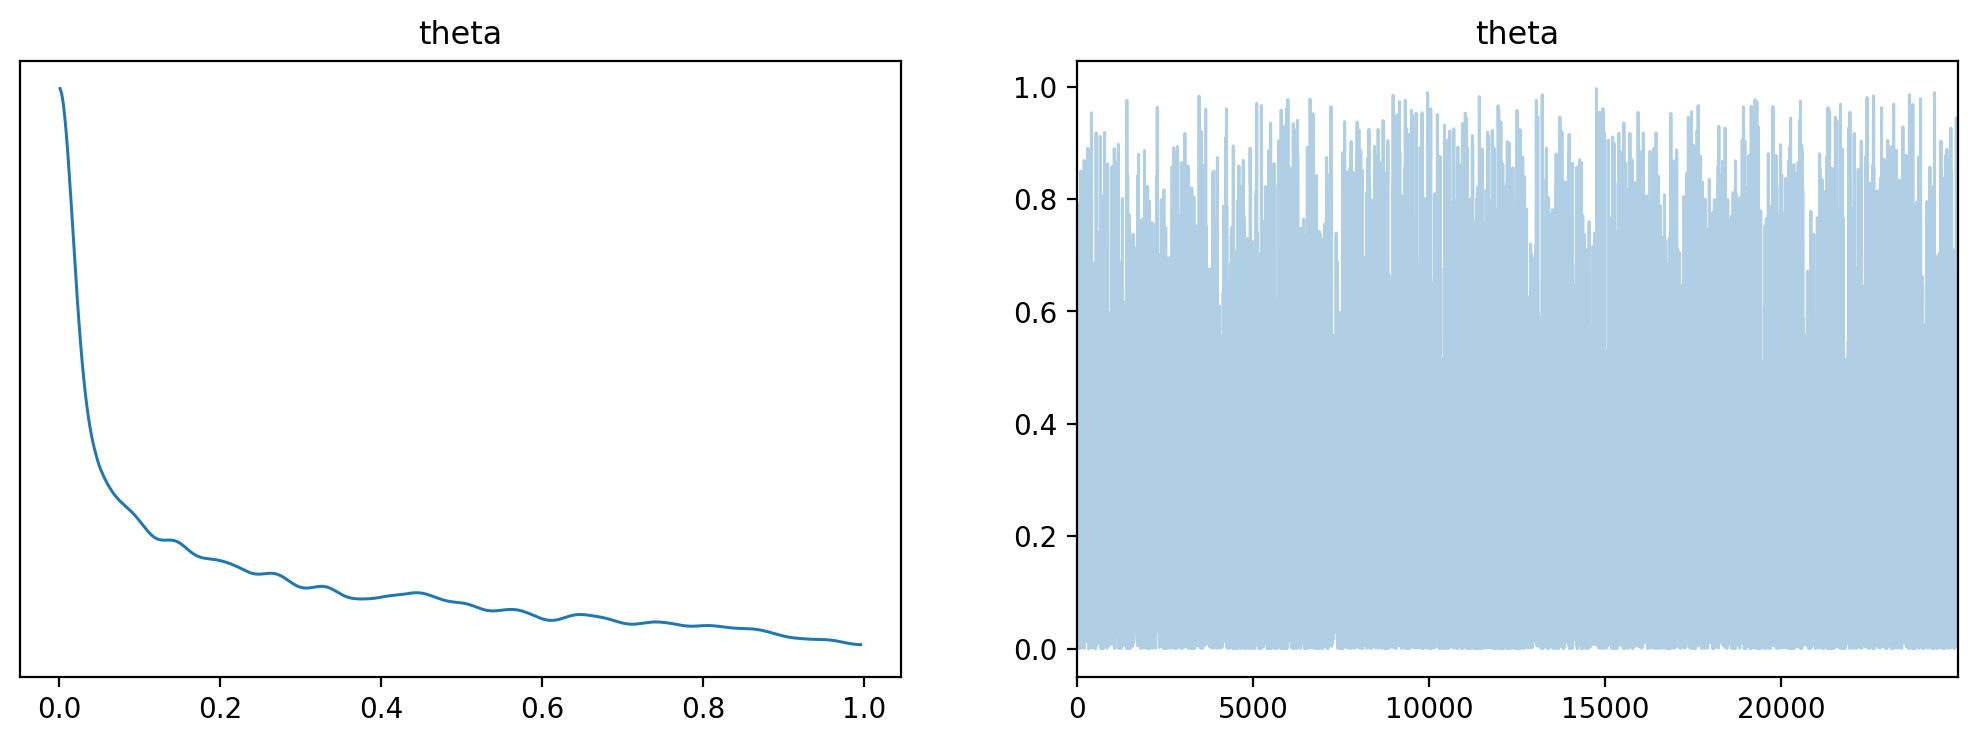

In [38]:
az.plot_trace(trace, figsize=(12.5, 4))
plt.show()

In [39]:
az.summary(trace)

Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.256,0.25,0.0,0.749,0.003,0.002,5072.0,5079.0,NaN


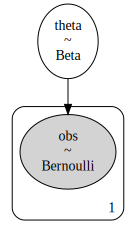

In [40]:
graphviz = pm.model_to_graphviz(white_house_model)
graphviz

# Ch 16

In [41]:
mu_0 = 12
tau_0 = 0.0625
alpha_0 = 25
beta_0 = 0.5
data = np.array([10.2])

In [42]:
with pm.Model() as maple_model:
  mu = pm.Normal("mu", mu=mu_0, tau=tau_0)
  tau = pm.Gamma("tau", alpha=alpha_0, beta=beta_0)
  observation = pm.Normal("obs", mu=mu, tau=tau, observed=data)

  trace = pm.sample(25000, tune=5000, chains=1, nuts_sampler="nutpie") # nutpie, blackjax, numpyro

[]

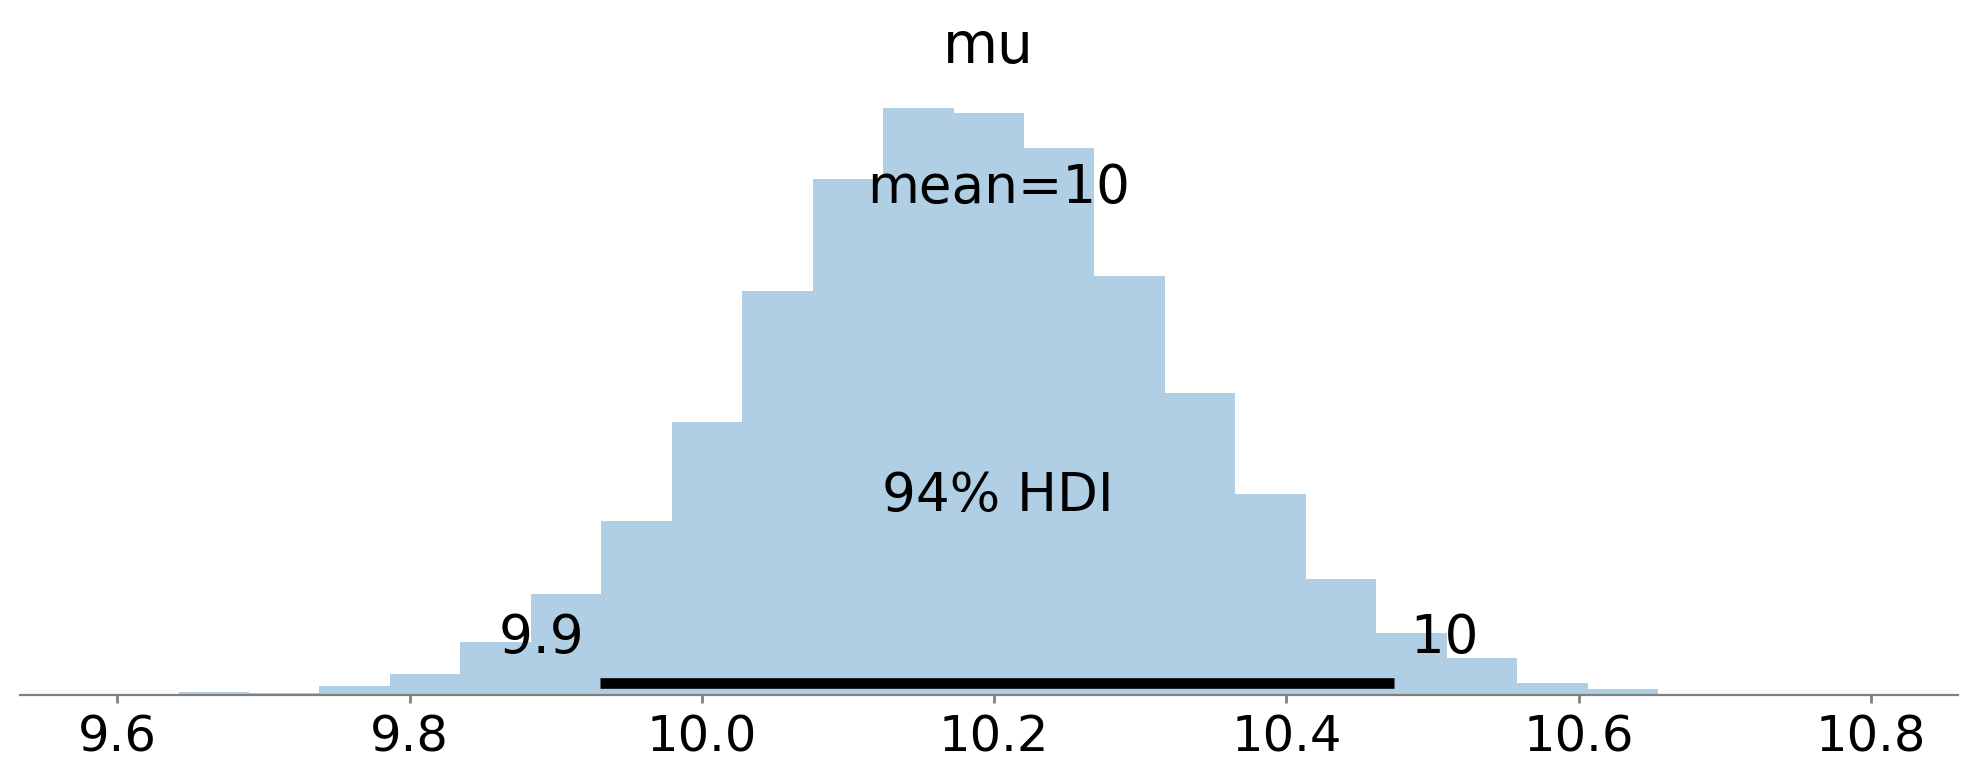

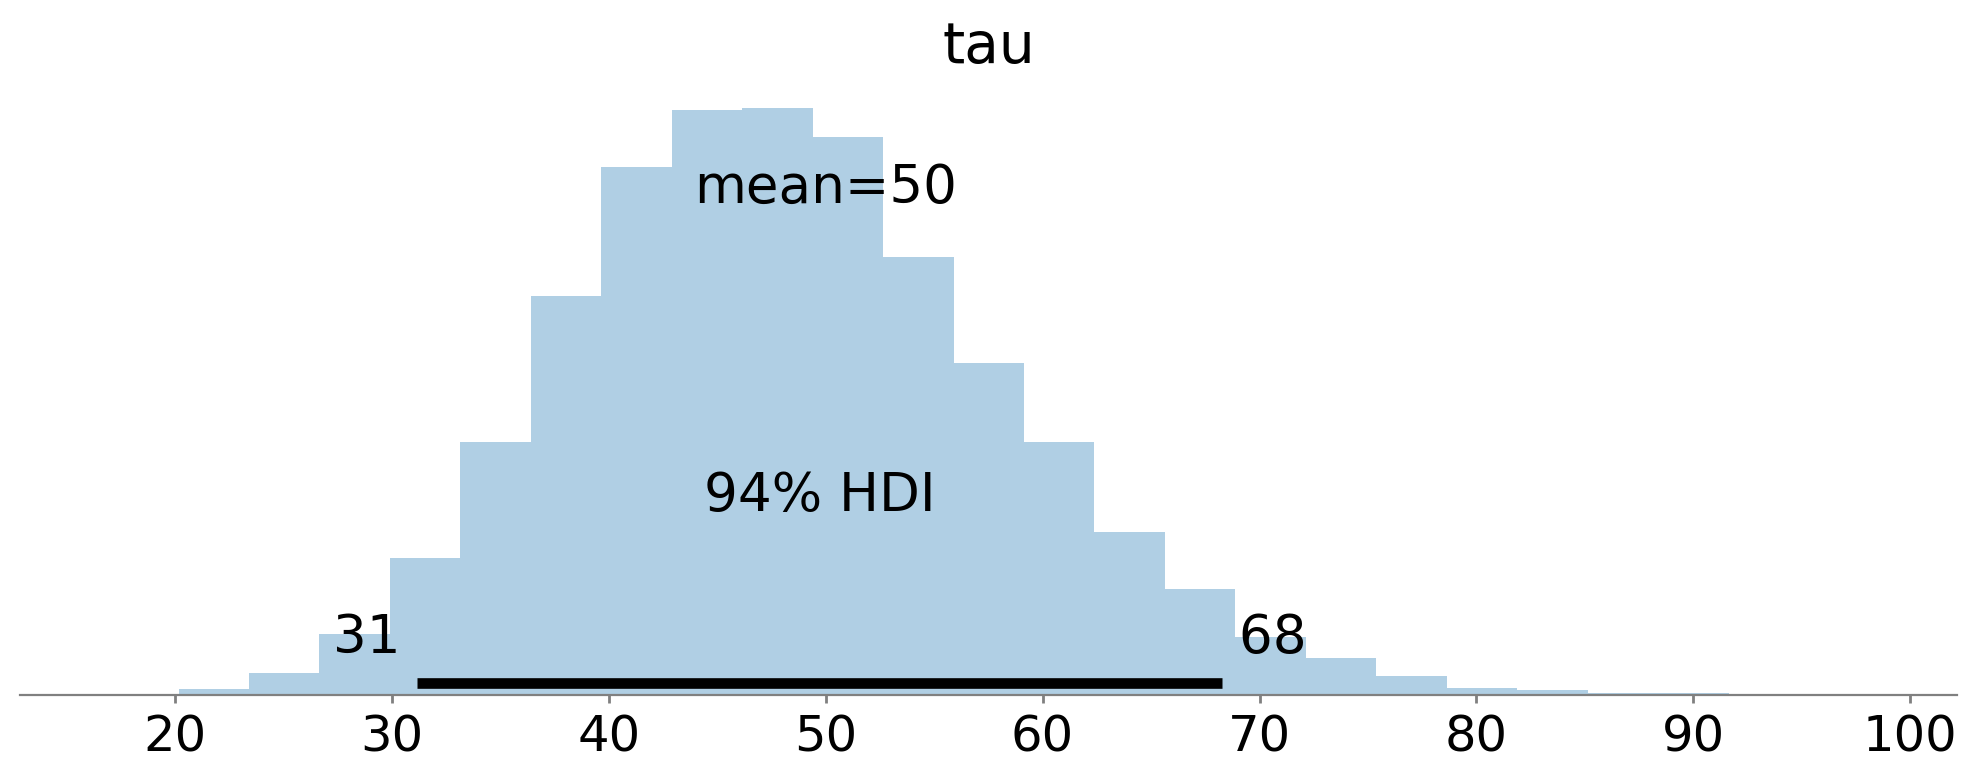

In [43]:
%config InlineBackend.figure_format = 'retina'

ax=az.plot_posterior(trace, var_names=['mu'], kind='hist', bins=25, figsize=(12.5,4))
ax=az.plot_posterior(trace, var_names=['tau'], kind='hist', bins=25, figsize=(12.5,4))
ax.plot()

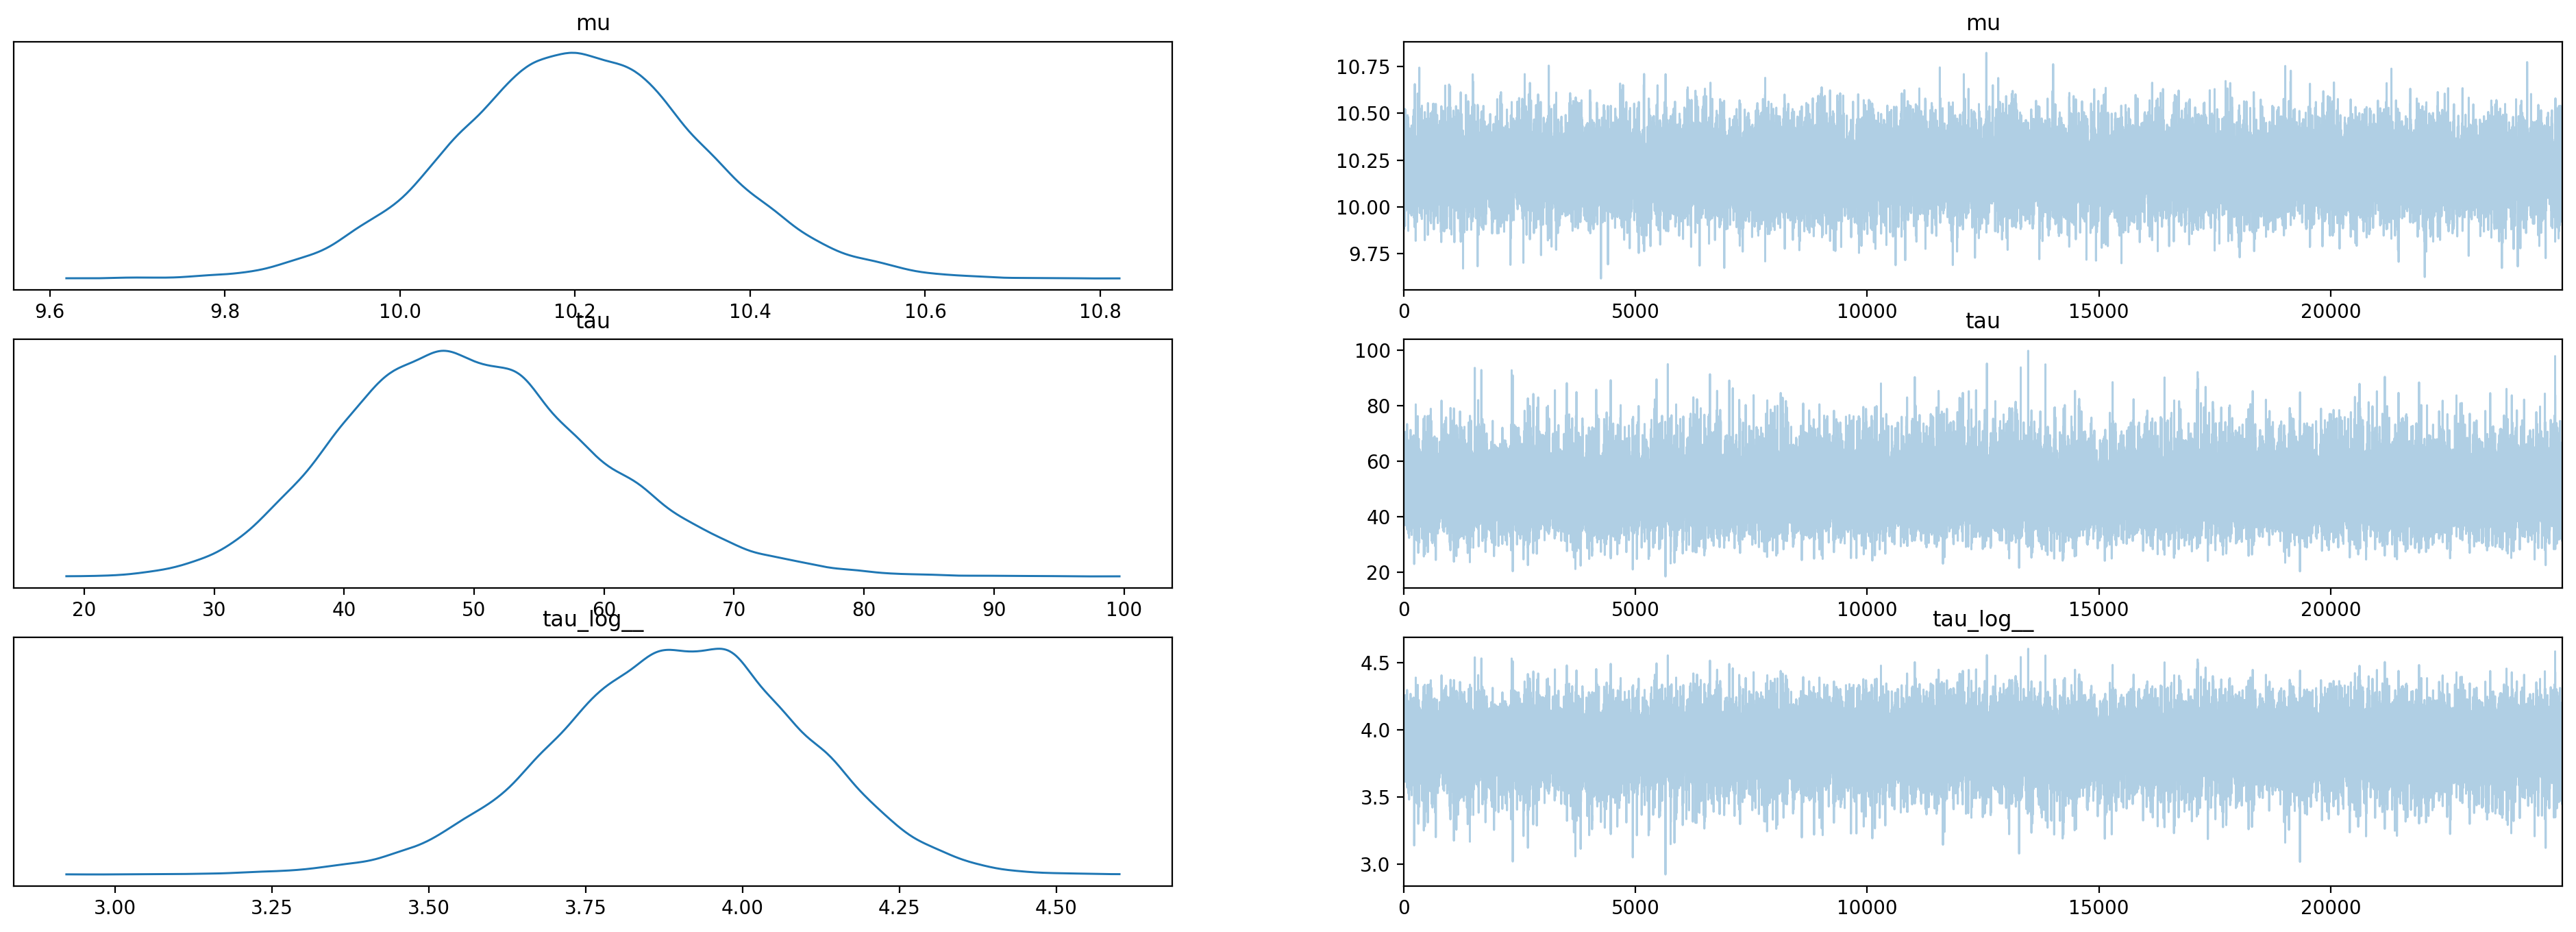

In [44]:
az.plot_trace(trace, figsize=(24, 8))
plt.show()

In [45]:
az.summary(trace)

Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,10.203,0.144,9.931,10.474,0.001,0.001,25975.0,17833.0,NaN
tau,50.015,9.993,31.179,68.278,0.064,0.046,24419.0,17398.0,NaN
tau_log__,3.892,0.202,3.505,4.260,0.001,0.001,24419.0,17398.0,NaN


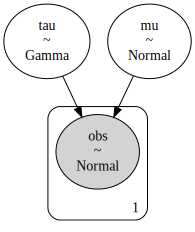

In [46]:
graphviz = pm.model_to_graphviz(maple_model)
graphviz

## Use nutpie to compile pymc model

In [47]:
with pm.Model() as maple_model:
  mu = pm.Normal("mu", mu=mu_0, tau=tau_0)
  tau = pm.Gamma("tau", alpha=alpha_0, beta=beta_0)
  observation = pm.Normal("obs", mu=mu, tau=tau, observed=data)

compiled_maple_model = nutpie.compile_pymc_model(maple_model)
trace = nutpie.sample(compiled_maple_model, draws=25000, tune=5000, chains=1)

[]

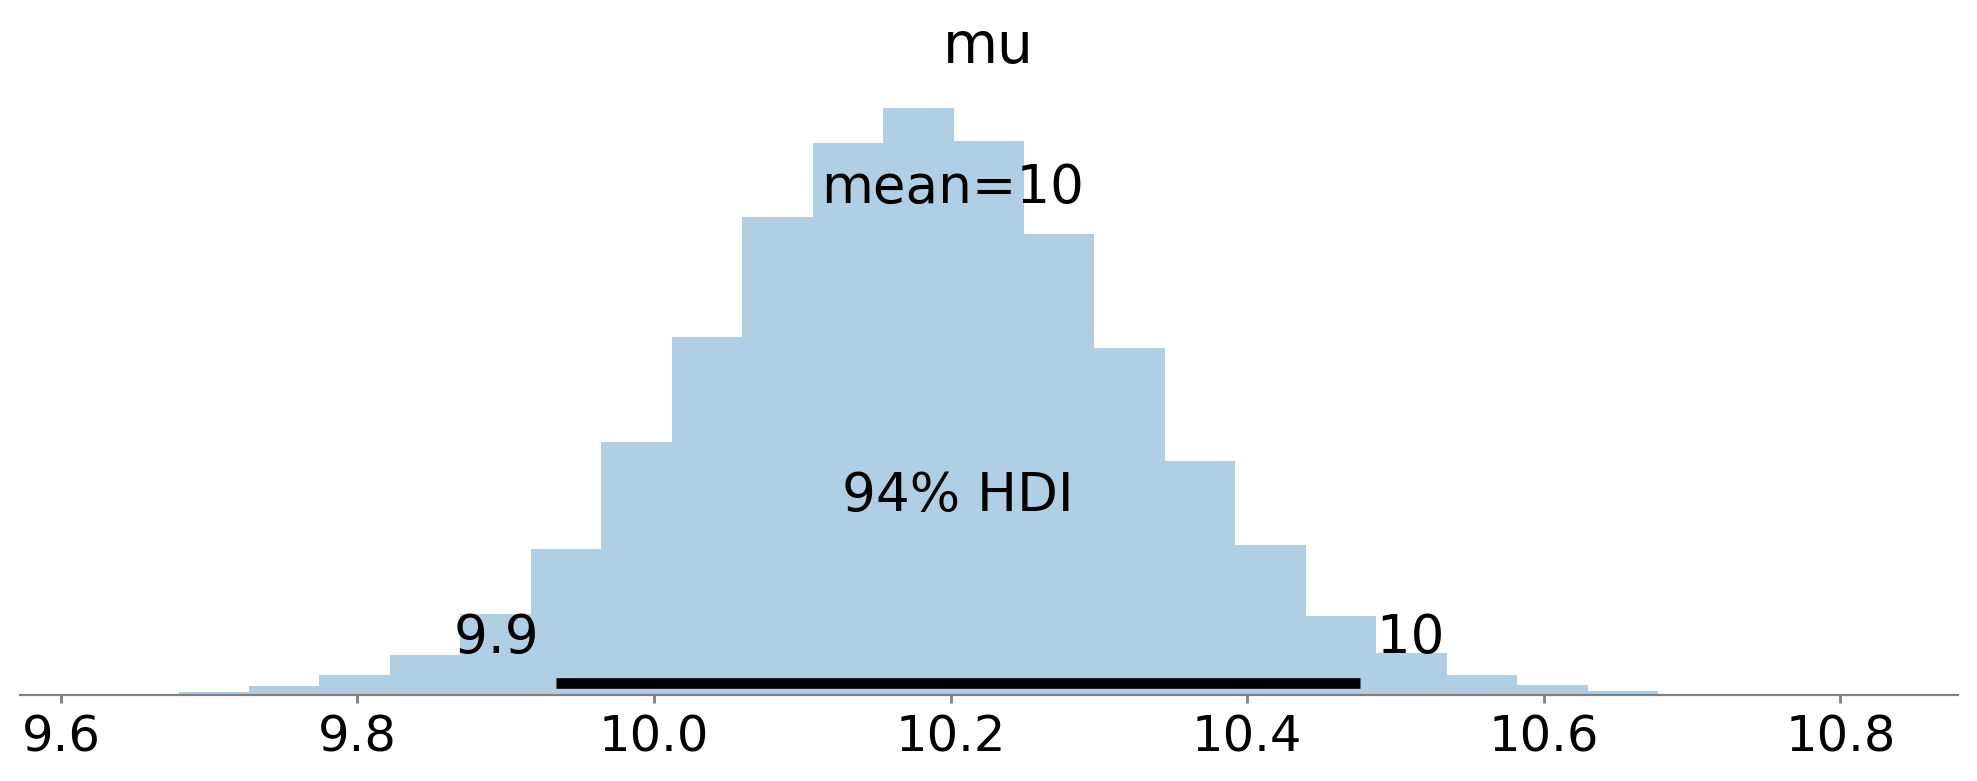

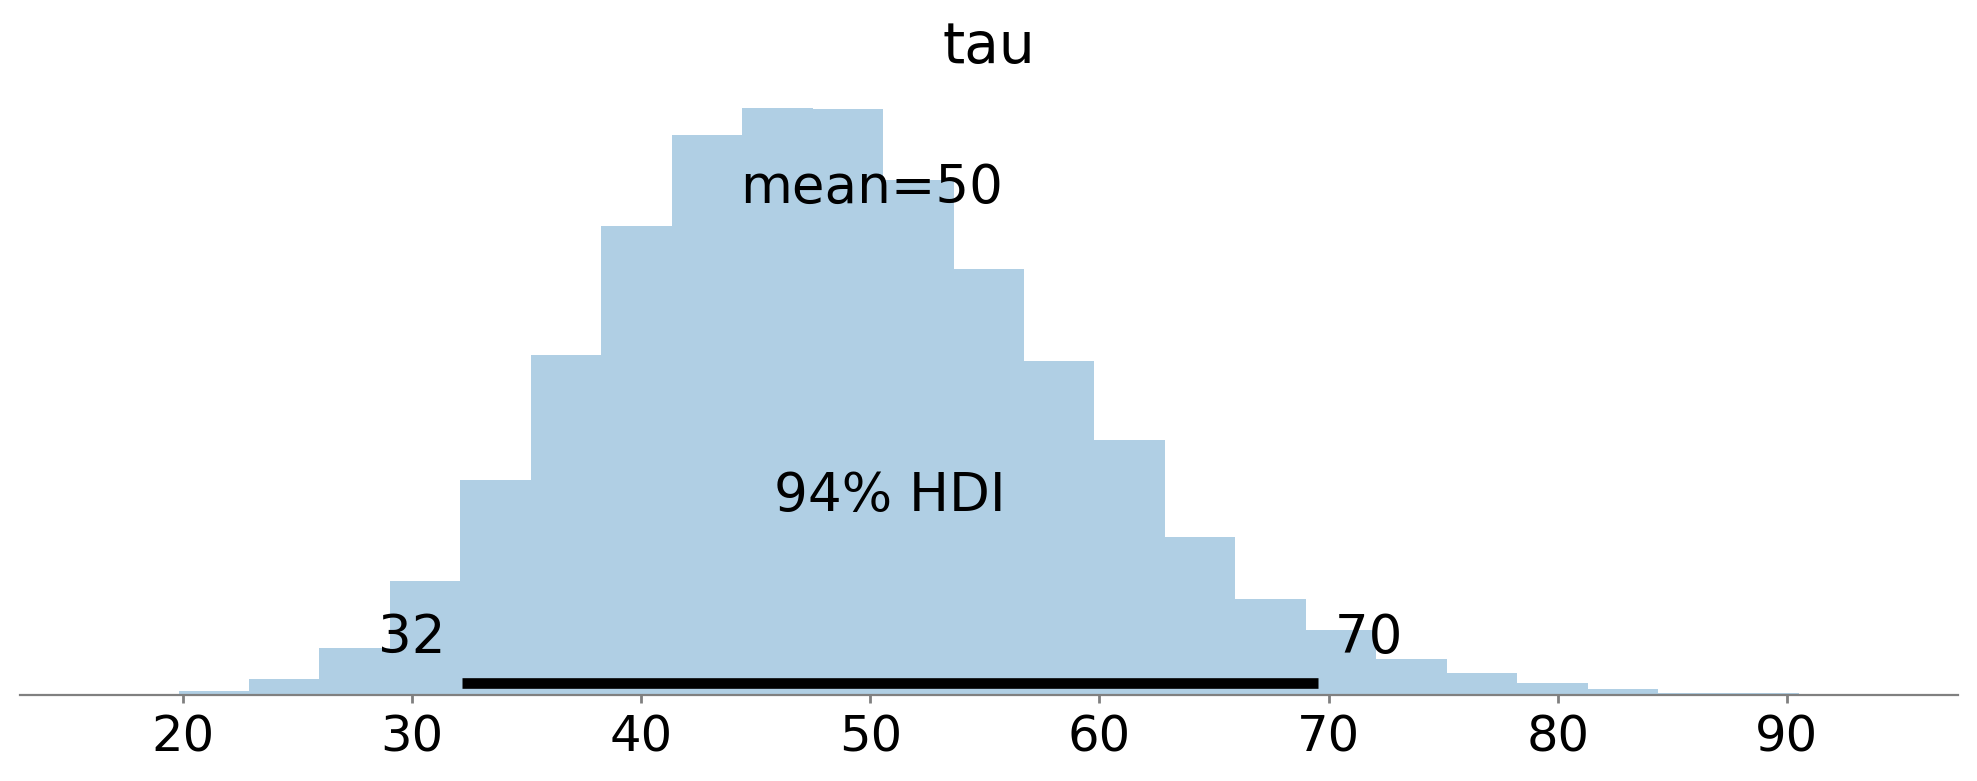

In [48]:
%config InlineBackend.figure_format = 'retina'

ax=az.plot_posterior(trace, var_names=['mu'], kind='hist', bins=25, figsize=(12.5,4))
ax=az.plot_posterior(trace, var_names=['tau'], kind='hist', bins=25, figsize=(12.5,4))
ax.plot()

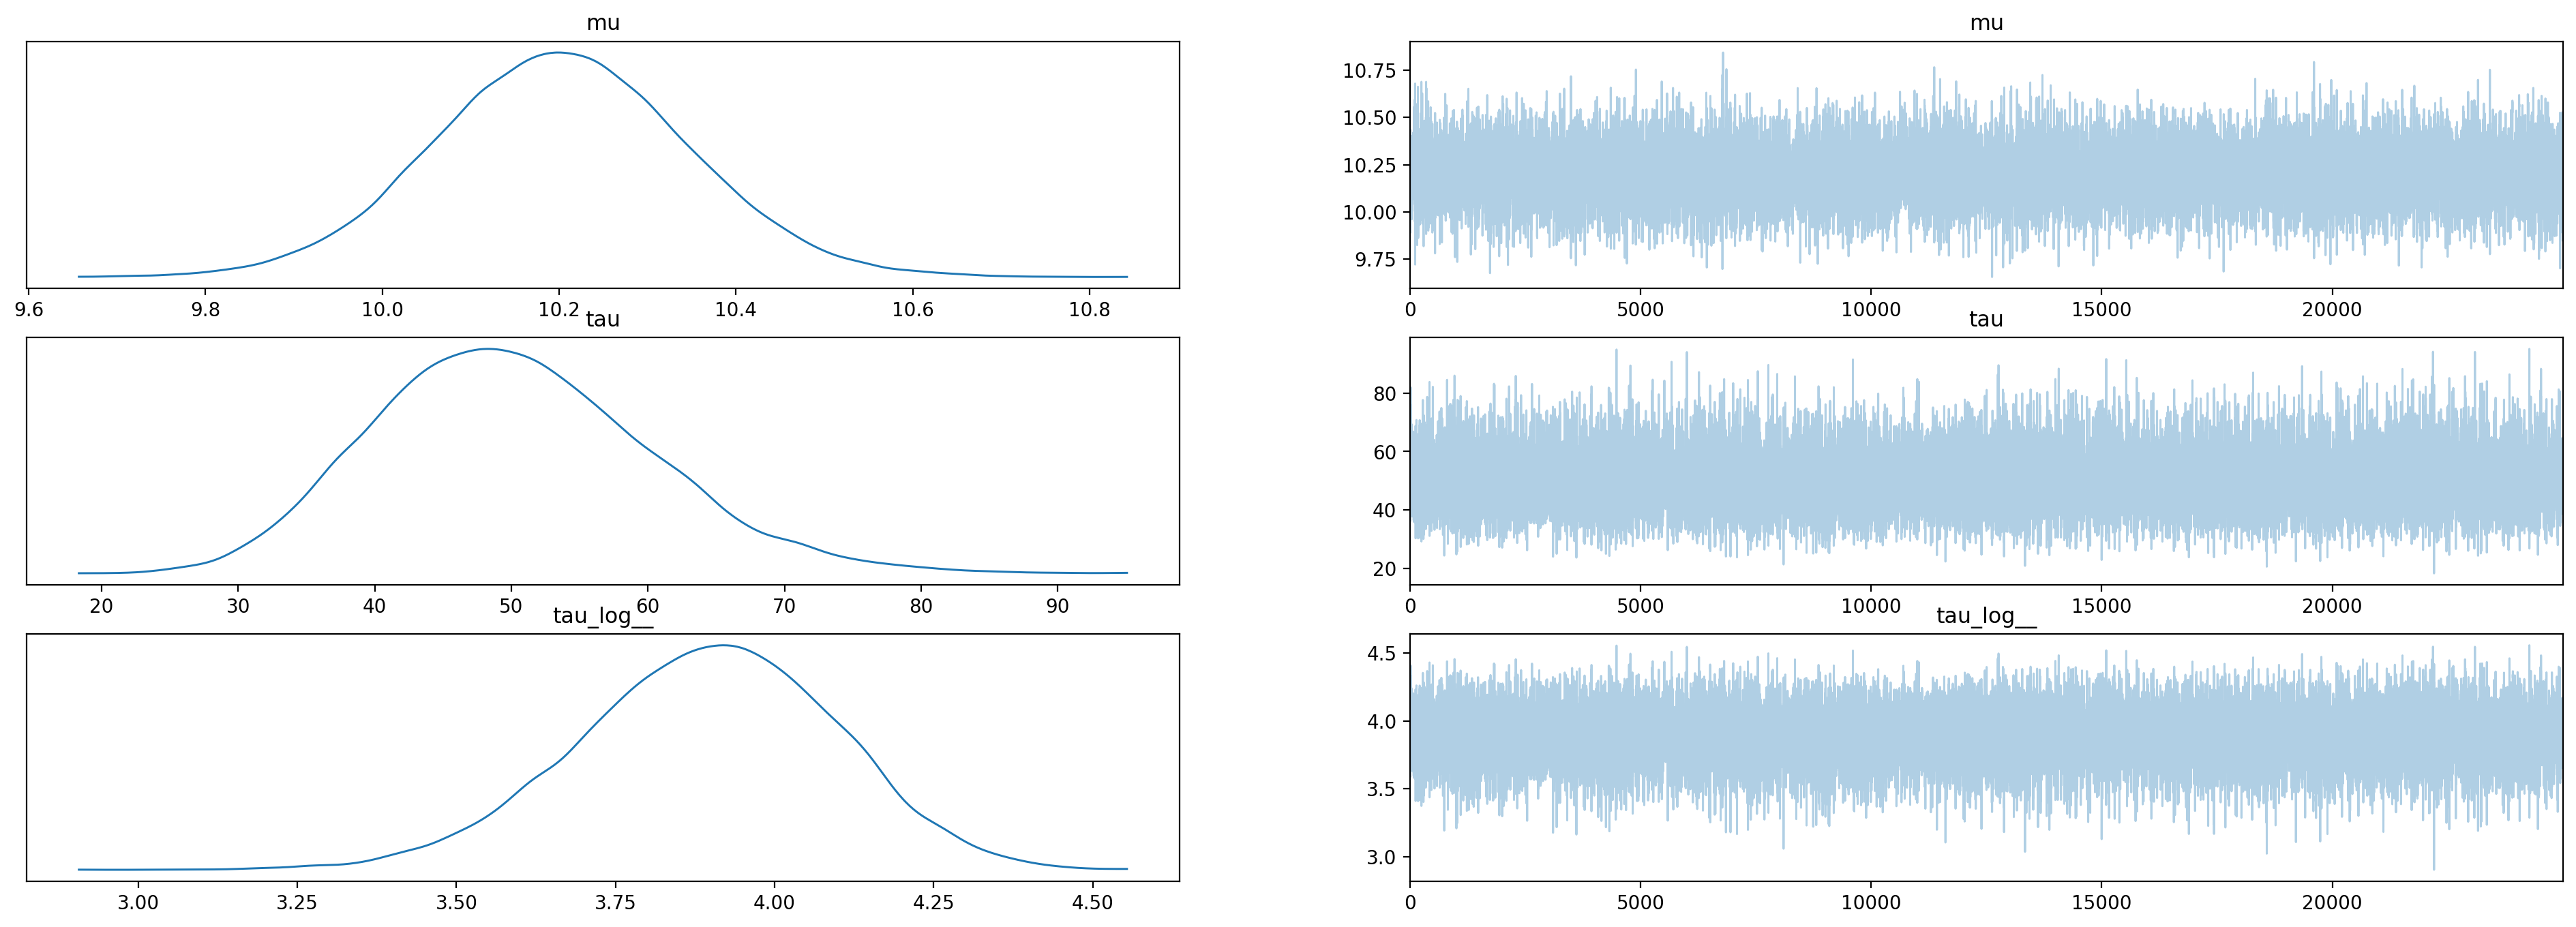

In [49]:
az.plot_trace(trace, figsize=(24, 8))
plt.show()

In [50]:
az.summary(trace)

Shape validation failed: input_shape: (1, 25000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,10.201,0.144,9.934,10.476,0.001,0.001,26170.0,16912.0,NaN
tau,50.062,10.055,32.186,69.547,0.065,0.047,23915.0,18015.0,NaN
tau_log__,3.893,0.203,3.504,4.264,0.001,0.001,23915.0,18015.0,NaN
